# Neural Networks

## Neurons

<img src="images/neurons.jpg" width="500">


<br><br><br><br><br><br><br><br><br><br><br><br>


## The perceptron

<img src="images/perceptron_publication.png" width="500">


The term comes from the basic unit in a neuron, which is called the perceptron.
* Binary classifier: there should be only two categories for classification
* Linear classifier: classification algorithm that makes all of its predictions based on a linear predictor function combining a set of weights with the feature vector

<br><br><br><br><br><br><br><br><br><br><br><br>

### A graphical representation

<img src="images/perceptron.png" width="500">


* Input: **all the features** are the input, represented as the feature vector $x$, consisting of $n$ components $[x_1, x_2, \ldots ,x_n]$. Additionally, we use another input called the **bias**.
* Weights: values computed when training the model. Initiated with a defined value (close to zero) and updated for each training error. Weights are $[w_1, w_2, \ldots w_n]$ and $w_0$ corresponds to the bias.
* Bias: the bias neuron lets the classifier shift the decision boundary left or right, helping to train the model faster (with better quality).
* Weighted summation: $$s(x) = \sum_{i = 0}^{n}{w_ix_i}$$
* Step/activation function: $$
a(x) = 
\begin{cases}
1, &s(x) \geq 0\cr
0, &s(x) = 0\cr
\end{cases}
$$

<br><br><br><br><br><br><br><br><br><br><br><br>

### The algorithm

* Online: can be computed and re-trained one training sample at a time
* Error-driven: as long as it is working correctly, it does not update the parameters

```python
# python-like pseudocode
def train_perceptron(train_set, num_iterations):
	weights = [0.0] + [0.0 for i in range(len(train_set[0][0]))]
	for i in range(num_iterations):
		for (x,y) in train_set:
            x = [1.0] + x
			s = sum(weights .* x)
            if y*s <= 0:
                weights = weights + y*x
	return weights
```

```python
# python-like pseudocode
def test_perceptron(weights, x):
    s = sum(weights .* x)
	return s >= 0
```

<br><br><br><br><br><br><br><br><br><br><br><br>

### Convergence

* The perceptron algorithm will eventually find a hyperplane that separates 2 classes of points, if such a hyperplane exists.
* If it is not the case, the algorithm iterates forever.

Possible solution: (Pocket algorithm) track the error the perceptron makes in each iteration and store the
best weights found so far in a separate memory (pocket).


### The hyperplane

* Find a separating hyperplane, if it exists
* If a separating hyperplane exists, then there may be infinitely many (equally good) separating hyperplanes
* The perceptron finds *any* of them!

<img src="images/perceptron_in_action.png" width="500">

*Which separating hyperplane is the optimal one? What does “optimal” actually mean?*


<br><br><br><br><br><br><br><br><br><br><br><br>

### Logistic Regression

Binary classification: $T = \{(x^i, y^i)\}$, where $y^i \in \{0, 1\}$

Given $x \in \mathbb{R}^{n}$, we would like to find $\hat{y} = P(y=1 | x)$

The "easiest" way of doing it is by $\hat{y} = w^Tx + b$ , where $w \in \mathbb{R}^n$ and $b \in \mathbb{R}$

What would be the range of such $\hat{y}$???

<br>

We can use a function that maps $\mathbb{R}$ to $[0,1]$

$\sigma(z) = \frac{1}{1 + e^{-z}}$

<br>

Given $T = \{(x^i, y^i)\}$, we would like to find $\hat{y}^i$ as close to $y^i$ as possible

#### The loss function

We could use $L(\hat{y},y) = \frac{1}{N}\sum_{i=1}^{N}{(\hat{y}^i - y^i)}^2$.

This is in a non-convex multimodal function which is hard to optimize

A better approach is to use

\begin{align*}
L(\hat{y},y) = 
\begin{cases}
-\log(\hat{y}, &y = 1\cr
-\log(1- \hat{y}), &y = 0\cr
\end{cases}
\end{align*}

or, in other words,

$L(\hat{y},y) = -(y \log(\hat{y}) + (1-y) \log(1-\hat{y}))$

#### The cost function

$J(w,b) = \frac{1}{N}\sum_{i=1}^{N}{L(\hat{y}^i,y^i)}$

**We want to find $w,b$ in order to minimize $J$**


<br><br><br><br><br><br><br><br><br><br><br><br>

#### Newton Algorithm + Gradient Descent

**whiteboard**

Iterate until there is no significant change: $w:= w - \frac{dJ}{dw}$


<br><br><br><br><br><br><br><br><br><br><br><br>

#### Computational graph (whiteboard)

**whiteboard**

Examples: http://colah.github.io/posts/2015-08-Backprop/


<br><br><br><br><br><br><br><br><br><br><br><br>

#### Computational graph for gradient descent in logistic regressions

**whiteboard**

<br><br><br><br><br><br><br><br><br><br><br><br>



<br><br><br><br><br><br><br><br><br><br><br><br>


## Neural networks

<img src="images/logistic_reg.png" width="500">

<img src="images/nn_parts.png" width="500">

(draw a representation of a NN (variables) on whiteboard)

<br><br><br><br><br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br><br><br>

### Two-layer neural networks (interesting theorem)

Let $F$ be a continuous function on a bounded subset of a N-dimensional
space. Then there exists a two-layer neural network $\hat{F}$ with a finite number of hidden units that approximate F arbitrarily well. $|F(x) - \hat{F}(x)| < \epsilon$ for any x in the domain of F, and $\epsilon$ > 0

### Activation functions

### Backpropagation


## Logistic Regression and Neural Networks in action

(a nice example mainly from https://github.com/andersy005/deep-learning-specialization-coursera)

In [3]:
%load_ext autoreload
%autoreload 1

import numpy as np
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network
import utils
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


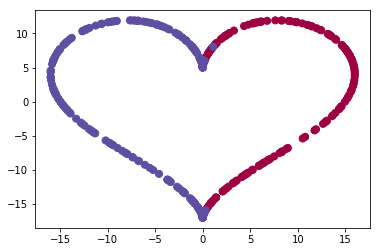

In [35]:
X,Y = utils.load_heart_dataset(2)
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=50, cmap=plt.cm.Spectral);

In [73]:
clf = sklearn.linear_model.Perceptron(max_iter=1, tol=1e-10)
clf.fit(X.T, Y.T.ravel());

/Users/mlmarenchino/.virtualenv/diplodatos/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Accuracy: 88 


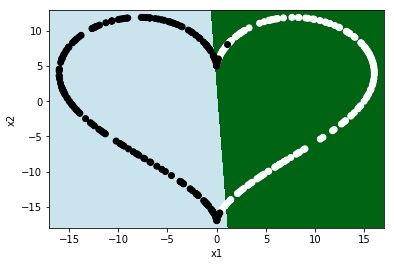

In [74]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X, Y)
LR_predictions = clf.predict(X.T)
print ('Accuracy: %d ' % float((int(np.dot(Y,LR_predictions)) + int(np.dot(1-Y,1-LR_predictions)))/float(Y.size)*100))

**What if we increase the number of iterations???**

In [75]:
clf = sklearn.linear_model.Perceptron(max_iter=1000, tol=1e-10)
clf.fit(X.T, Y.T.ravel());

Accuracy: 84 


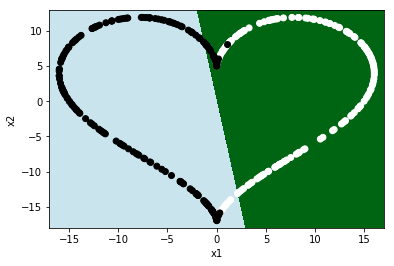

In [76]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X, Y)
LR_predictions = clf.predict(X.T)
print ('Accuracy: %d ' % float((int(np.dot(Y,LR_predictions)) + int(np.dot(1-Y,1-LR_predictions)))/float(Y.size)*100))

The accuracy has decreased... **How come!?!?** Check this out

In [78]:
import random
indices = list(range(X.T.shape[0]))
random.shuffle(indices)

In [83]:
clf = sklearn.linear_model.Perceptron(max_iter=10, tol=1e-10)
clf.fit(X.T[indices,:], Y.T[indices].ravel());

Accuracy: 93 


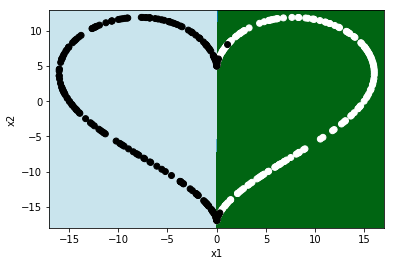

In [84]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X, Y)
LR_predictions = clf.predict(X.T)
print ('Accuracy: %d ' % float((int(np.dot(Y,LR_predictions)) + int(np.dot(1-Y,1-LR_predictions)))/float(Y.size)*100))

In [85]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X.T, Y.T.ravel());

Accuracy: 93 


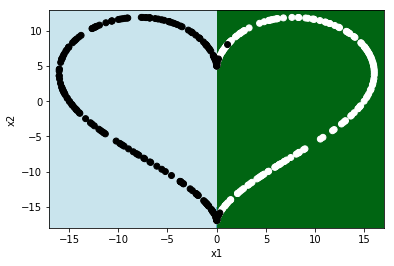

In [86]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X, Y)
LR_predictions = clf.predict(X.T)
print ('Accuracy: %d ' % float((int(np.dot(Y,LR_predictions)) + int(np.dot(1-Y,1-LR_predictions)))/float(Y.size)*100))

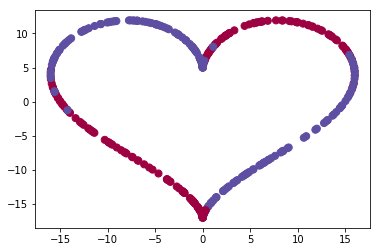

In [87]:
X,Y = utils.load_heart_dataset(4)
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=50, cmap=plt.cm.Spectral);

In [88]:
clf = sklearn.linear_model.LogisticRegression();
clf.fit(X.T, Y.T.ravel());

Accuracy: 49 


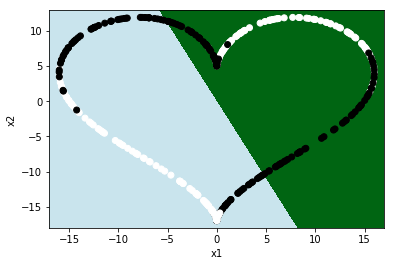

In [89]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X, Y)
LR_predictions = clf.predict(X.T)
print ('Accuracy: %d ' % float((int(np.dot(Y,LR_predictions)) + int(np.dot(1-Y,1-LR_predictions)))/float(Y.size)*100))

In [90]:
clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
clf.fit(X.T, Y.T.ravel());

Accuracy: 87 


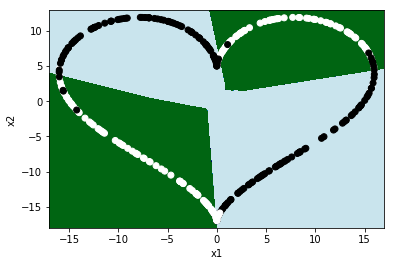

In [91]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X, Y)
LR_predictions = clf.predict(X.T)
print ('Accuracy: %d ' % float((int(np.dot(Y,LR_predictions)) + int(np.dot(1-Y,1-LR_predictions)))/float(Y.size)*100))